In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
dat_0 = np.genfromtxt(r"C:\Users\Gebruiker\Documents\HexAnalysis\data\interim\position_log_files\2018-11-21_16-10-38\pos_log_file_0.csv", delimiter=',', skip_header=False)
dat_1 = np.genfromtxt(r"C:\Users\Gebruiker\Documents\HexAnalysis\data\interim\position_log_files\2018-11-21_16-10-38\pos_log_file_1.csv", delimiter=',', skip_header=False)

26719 26754


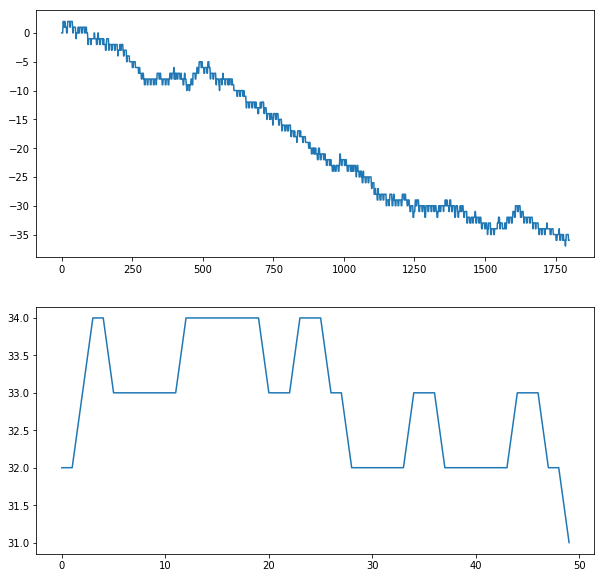

In [4]:
led_0 = dat_0[:,3]
led_1 =dat_1[:,3]
led_0_peaks = np.diff(led_0) > 0
led_1_peaks = np.diff(led_1) > 0
i_0 = np.where(led_0_peaks == 1)[0]
i_1 = np.where(led_1_peaks == 1)[0]
i_diff = i_0-i_1
i_diff_2 = i_1[1550:1600]-i_0[1550:1600]
fig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].plot(i_diff)
ax[1].plot(i_diff_2)

In [10]:
if len(led_0) > len(led_1):
    dat_0f = dat_0
    dat_1f = np.full_like(dat_0f, np.nan)
    for i in range(len(i_1)-1):
        dat_0f[i_1[i]:i_1[i]+(i_0[i+1]-i_0[i])] = dat_0[i_0[i]:i_0[i+1]]
elif len(led_0) < len(led_1):
    dat_1f = dat_1
    dat_0f = np.full_like(dat_1f, np.nan)
    for i in range(len(i_0)-1):
        dat_0f[i_1[i]:i_1[i]+(i_0[i+1]-i_0[i])] = dat_0[i_0[i]:i_0[i+1]]

C:\Users\Gebruiker\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


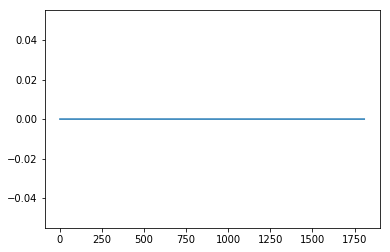

In [11]:
led_0 = dat_0f[:,3]
led_1 =dat_1f[:,3]
led_0_peaks = np.diff(led_0) > 0
led_1_peaks = np.diff(led_1) > 0
i_0 = np.where(led_0_peaks == 1)[0]
i_1 = np.where(led_1_peaks == 1)[0]
i_diff = i_0 - i_1[:len(i_0)]
plt.plot(i_diff)

In [8]:
dat_0 = np.genfromtxt(r"C:\Users\Gebruiker\Documents\HexAnalysis\data\interim\position_log_files\2018-11-21_16-10-38\pos_log_file_0.csv", delimiter=',', skip_header=False)
dat_1 = np.genfromtxt(r"C:\Users\Gebruiker\Documents\HexAnalysis\data\interim\position_log_files\2018-11-21_16-10-38\pos_log_file_1.csv", delimiter=',', skip_header=False)
led_0 = dat_0[:,3]
led_1 = dat_1[:,3]
led_0_peaks = np.diff(led_0) > 0
led_1_peaks = np.diff(led_1) > 0
i_0 = np.where(led_0_peaks == 1)[0]
i_1 = np.where(led_1_peaks == 1)[0]
peak_diff_0 = np.diff(i_0)
peak_diff_1 = np.diff(i_1)

dat_0f = np.full_like(dat_0[:peak_diff_0[0]-1,:], np.nan)
dat_1f = np.full_like(dat_1[:peak_diff_1[0]-1, :], np.nan)

min_it = np.min([len(peak_diff_0),len(peak_diff_1)])

check = []

for i in range(min_it):
    if peak_diff_0[i] > peak_diff_1[i]:
        dat_0f = np.concatenate((dat_0f,dat_0[i_0[i]:i_0[i+1]]), axis=0)
        dat_1f = np.concatenate((dat_1f,dat_1[i_1[i]:i_1[i+1]]), axis=0)
        if not i == min_it-1:
            diff = peak_diff_0[i]-peak_diff_1[i]
            add = np.full((diff,4), np.nan)
            dat_1f = np.concatenate((dat_1f,add), axis=0)
        check.append(0)
        
    elif peak_diff_1[i] > peak_diff_0[i]:
        dat_1f = np.concatenate((dat_1f,dat_1[i_1[i]:i_1[i+1]]), axis=0)
        dat_0f = np.concatenate((dat_0f,dat_0[i_0[i]:i_0[i+1]]), axis=0)
        if not i == min_it-1:
            diff = peak_diff_1[i]-peak_diff_0[i]
            add = np.full((diff,4), np.nan)
            dat_0f = np.concatenate((dat_0f, add), axis=0)
        check.append(1)
    
    elif peak_diff_0[i] == peak_diff_1[i]:
        dat_0f = np.concatenate((dat_0f,dat_0[i_0[i]:i_0[i+1]]), axis=0)
        dat_1f = np.concatenate((dat_1f,dat_1[i_1[i]:i_1[i+1]]), axis=0)
        check.append(2)
        
print(len(dat_0f),len(dat_1f))
print(check)
counts = np.bincount(check)
print(counts)

26970 26970
[2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 

In [9]:
np.savetxt("tcorr_0.csv", dat_0f, delimiter=",", header="x,y,frame_n,LED_state", comments='')
np.savetxt("tcorr_1.csv", dat_1f, delimiter=",", header="x,y,frame_n,LED_state", comments='')

C:\Users\Gebruiker\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gebruiker\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


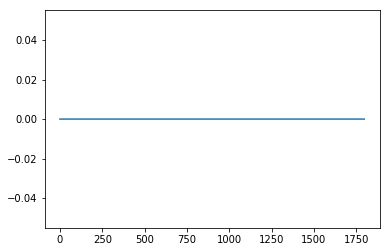

In [11]:
led_0 = dat_0f[:,3]
led_1 =dat_1f[:,3]
led_0_peaks = np.diff(led_0) > 0
led_1_peaks = np.diff(led_1) > 0
i_0 = np.where(led_0_peaks == 1)[0]
i_1 = np.where(led_1_peaks == 1)[0]
i_diff = i_0 - i_1
plt.plot(i_diff)